## Módulo 3 Unidad 2: Práctica 9 - Uso de SHAP.

### 1. Descripción del conjunto de datos.
En primer lugar vamos a cargar los datos de nuestro archivo data.csv en un dataframe de Pandas para proceder a su análisis.



In [3]:
import pandas as pd

df = pd.read_csv('churn_data.csv', sep=',') # creamos dataframe a partir de la lectura del archivo

In [4]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape # vemos la forma de nuestro dataframe (filas o registros y columnas o atributos)

(7043, 9)

In [6]:
df.info() # los tipos de datos de nuestro dataframe son los siguientes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [7]:
df.nunique() # análisis de valores únicos incluyendo nulos

customerID          7043
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
# Seleccionamos las columnas categóricas para analizar su valores únicos
columnas = ['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Analizamos los valores únicos y sus frecuencias
for columna in columnas:
    valores_unicos = df[columna].unique()
    total_valores = df[columna].value_counts()
    print(f'\n-- Variable: {columna} --')
    print(f'Valores únicos: {valores_unicos}')
    print('Frecuencia:')
    print(total_valores.to_string())


-- Variable: PhoneService --
Valores únicos: ['No' 'Yes']
Frecuencia:
PhoneService
Yes    6361
No      682

-- Variable: Contract --
Valores únicos: ['Month-to-month' 'One year' 'Two year']
Frecuencia:
Contract
Month-to-month    3875
Two year          1695
One year          1473

-- Variable: PaperlessBilling --
Valores únicos: ['Yes' 'No']
Frecuencia:
PaperlessBilling
Yes    4171
No     2872

-- Variable: PaymentMethod --
Valores únicos: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Frecuencia:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522

-- Variable: Churn --
Valores únicos: ['No' 'Yes']
Frecuencia:
Churn
No     5174
Yes    1869


**Conclusiones previas:**

Se trata de un dataset con datos de clientes de una compañía probablemente de servicios de telecomunicaciones (móvil o internet) y de si han abandonado o no a esta empresa como proveedor de servicio. Tiene un total de 7043 registros y 9 características las cuales se describen a continuación:
- customerID: variable tipo texto con identificador o código del cliente.
- tenure: variable numérica tipo entero que representa la antigüedad del cliente en meses.
- PhoneService: variable categórica de si el cliente tiene servicio telefónico. Dos posibles valores: Yes o No.
- Contract: variable categórica tipo texto que representa el tipo de contrato:
    - Month-to-month (mes a mes).
    - One year (anual).
    - Two year.
- PaperlessBilling: variable categórica de si el cliente usa factura electrónica. Dos posibles valores: Yes o No.
- PaymentMethod: variable categórica tipo texto del método o forma de pago. Sus posibles valores son los siguientes:
    - Electronic check
    - Mailed check
    - Bank transfer (automatic)
- MonthlyCharges: variable numérica tipo float con la cantidad facturada mensualmente al cliente.
- TotalCharges: variable tipo texto con la cantidad total facturada al cliente.
- Churn: Variable categórica que es nuestra variable objetivo la cual indica si el cliente abandonó el servicio. Sus posibles valores son Yes o No.

Por último, destacar que nuestro dataset no contiene ningún nulo.

In [10]:
df.describe() # Mostramos las variables numéricas

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [11]:
df.describe(include=['O']) # Mostramos las variables categóricas

,customerID,PhoneService,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,2,4,6531,2
top,7590-VHVEG,Yes,Month-to-month,Yes,Electronic check,,No
freq,1,6361,3875,4171,2365,11,5174


Vamos a ver la distribución de las proporciones de las variables categóricas de una manera más gráfica.

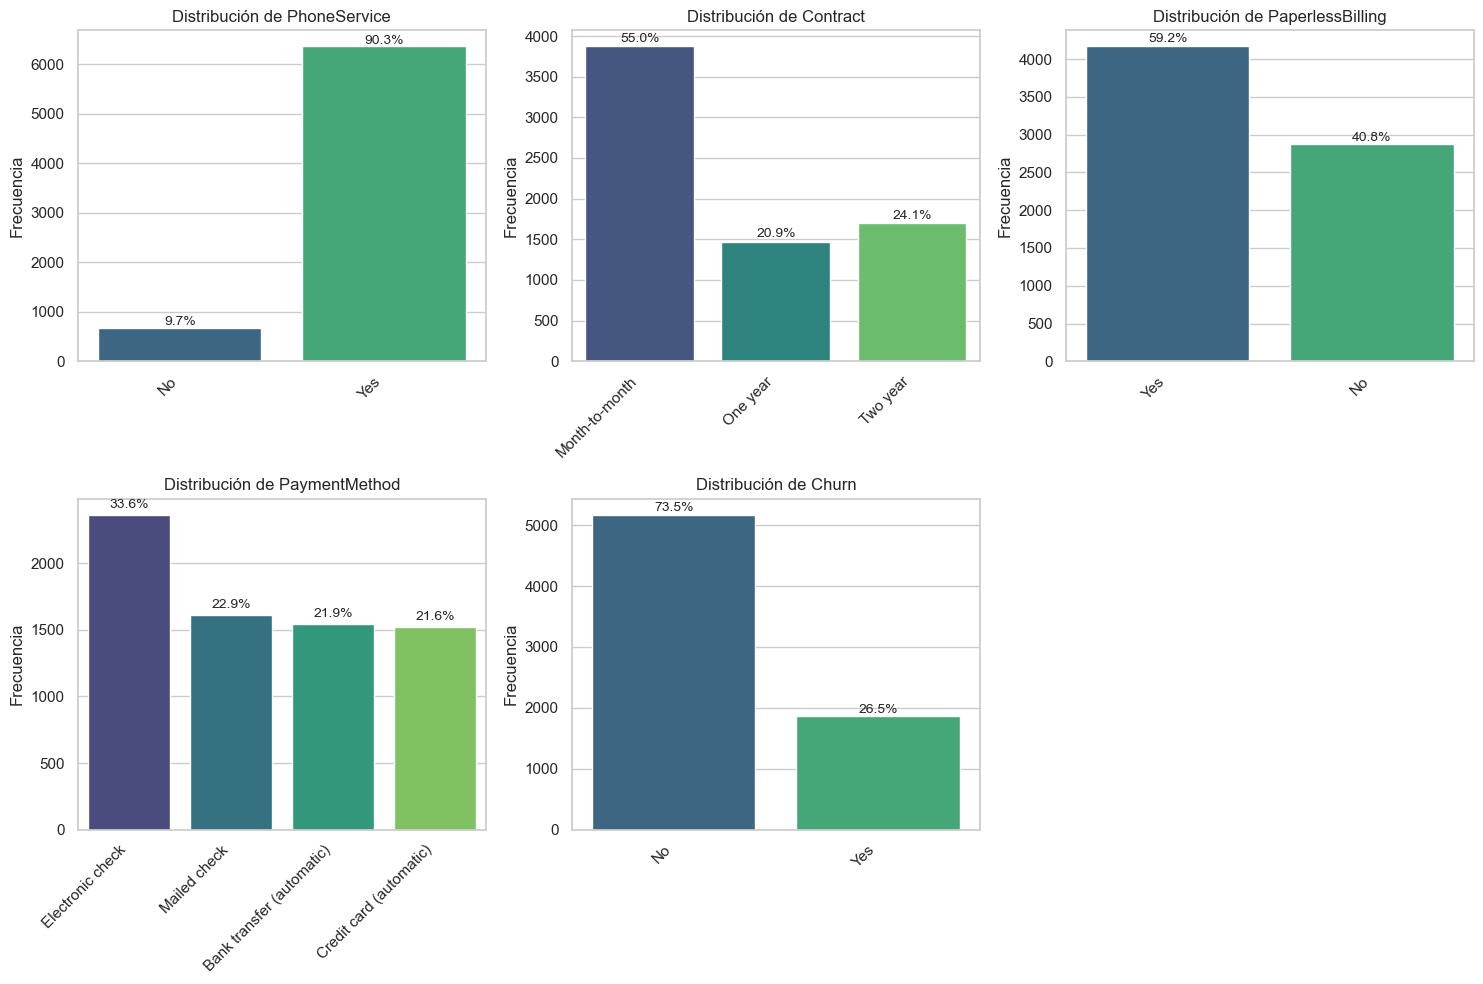

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo para los gráficos
sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))

# Creamos un gráfico para cada variable
for i, columna in enumerate(columnas, 1):
    plt.subplot(2, 3, i)  # 2 filas y 3 columnas de subplots
    ax = sns.countplot(data=df, x=columna, hue=columna, palette='viridis') # usamos seaborn
    
    # Añadimos porcentajes en las barras
    total = len(df[columna])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 50,
                f'{height/total:.1%}',
                ha='center', fontsize=10)

    # Configuramos etiquetas
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribución de {columna}')
    plt.xlabel('')
    plt.ylabel('Frecuencia')

# Ajustar layout y mostrar gráficos
plt.tight_layout()
plt.show()

**Conclusiones:**
Podemos extraer algunas conclusiones de las variables:
1. Variables numéricas:
- Tenure: la antigüedad promedio de los clientes es de 32 meses aproximadamente, es decir, poco más de dos años y medio, lo que sugiere que existe una rotación moderada. Como es lógico, existe una alta dispersión (desviación estándar std), ya que hay clientes nuevos (0 meses) y otros antiguos (72 meses). Si analizamos los percentiles, el 25% de los clientes tiene 9 meses o menos de antigüedad. La mitad de los clientes (mediana) lleva 2 años y medio, y tan solo el 25% supera los 55 meses (4 años y medios) de antigüedad.
- MonthlyCharges: la facturación mensual tiene una media de 64.76 dolares (podrían ser €, pero se desconoce ese dato del dataset). La desviación estándar es de 30.09 dólares, lo que sugiere una amplia dispersión. La facturación mínima es de 18.25 dólares y la máxima es de 118.75 dólares, lo puede indicar que exisitirán distintos planes ofrecidos por la compañía.
2. Variables categóricas:
- customerID: como era de esperar presenta 7043 registros únicos, es decir, un identificador único para cada cliente.
- PhoneService: en torno al 90% de los clientes (6361 de 7043) tiene servicio telefónico.
- Contract: en torno al 55% de los clientes (3875 de 7043) tiene contrato mensual.
- PaperlessBilling: en torno al 59% de los clientes (4171 de 7043) tienen facturación electrónica.
- PaymentMethod: el método más común de pago es Electronic Check con un 33.5% (2365 de 7043).
- Churn: el 73.5% de los clientes registrados en el dataset (5174 de 7043) no abanadonan la compañía. Esto indica un desbalance de la clase objetivo, por lo que nuestro modelo podría tener un sesgo hacia la clase mayoritaria 'No', algo a tener en cuenta.

### 2. Preprocesamiento de los datos.
Tras el análisis previo de nuestras variables, vemos que necesitamos aplicar modificaciones a nuestro dataframe para que este sea válido de cara los modelos de entrenamiento. Las modificaciones a realizar serán las siguientes:
1. Eliminación de la columna 'customerID', ya que esta columna es un identificador único que no presenta relación con el resto de variables o la variable objetivo.
2. Conversión de variables categóricas a numéricas para poder trabajar con los modelos.
3. Conversión de la variable 'TotalCharges' de tipo texto a float.

In [24]:
# 1. Eliminación de la columna customerID
dfc = df.copy() # vamos a trabajar con una copia del dataset original
dfc = df.drop(columns=['customerID'])
dfc

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [27]:
# Vamos a mapear las variables tipo texto a un tipo entero donde 'No' será 0 y 'Yes' será 1
dfc['PhoneService'] = dfc['PhoneService'].map({
    'No': 0,
    'Yes': 1
    })
dfc['Contract'] = dfc['Contract'].map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
    })
dfc['PaperlessBilling'] = dfc['PaperlessBilling'].map({
    'No': 0, 
    'Yes': 1
    })
dfc['PaymentMethod'] = dfc['PaymentMethod'].map({
    'Electronic check': 0, 
    'Mailed check': 1, 
    'Bank transfer (automatic)': 2, 
    'Credit card (automatic)': 3,
    })
dfc['Churn'] = dfc['Churn'].map({
    'No': 0, 
    'Yes': 1
    })

# Comprobamos el resultado del mapeado
dfc.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0,29.85,29.85,0
1,34,1,1,0,1,56.95,1889.5,0
2,2,1,0,1,1,53.85,108.15,1
3,45,0,1,0,2,42.30,1840.75,0
4,2,1,0,1,0,70.70,151.65,1


In [29]:
import numpy as np

# 3. Conversión de la variable TotalCharges de texto a float usando el método de pandas to_numeric
# en caso de cadenas vacías reemplazamos por NAN.
dfc['TotalCharges'] = pd.to_numeric(dfc['TotalCharges'].replace(' ', np.nan))

In [31]:
# Comprobamos el número de nulos generados tras la conversión
print('Total de nulos en TotalCharges: ', dfc['TotalCharges'].isna().sum())

Total de nulos en TotalCharges:  11


**Conclusión:** tenemos un total de 11 nulos de 7043 muestras. Se trata de tan solo un 0.15% del total de las muestras, por lo que podemos optar por eliminar estos registros.

In [34]:
dfc = dfc.dropna(subset=['TotalCharges']) # eliminamos los registros que contienen nulos en la variable TotalCharges

In [36]:
print(dfc['TotalCharges'].describe()) # analizamos nuestra variable ahora numérica

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


**Conclusiones:** la media de gasto de un cliente durante su relación con la empresa es de 2283 dólares. Respecto al máximo (8684 dólares), es un valor relativamente bajo. Esto puede deberse a que existan muchos clientes con antigüedad baja, cosa que vimos cuando analizamos la variable Tenure (antigüedad) o a la contratación de planes más económicos. Si analizamos la desviación estándar (std), vemos que es de 2266 dólares, lo que significa que existe una alta dispersión, es decir, los datos están alejados de la media. Por último, si nos fijamos en los percentiles, vemos que un 25% de los clientes pagó igual o menos de 401 dólares, lo que sigue corrobarando nuestras hipótesis anteriores.

### 3. División del dataset en conjuntos de entrenamiento y prueba.
En primer lugar utilizaremos 'train_test_split' par la división de nuestros datos.

In [40]:
from sklearn.model_selection import train_test_split


X = dfc.drop(columns=['Churn']) # dataframe de entrenamiento (eliminamos la variable objetivo)

y = dfc.Churn # dataframe de prueba (escogemos la variable objetivo churn)

# Dividimos el conjunto de datos en entrenamiento (75%) y prueba (25%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 4. Aplicación del modelo Ramdom Forest.

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Creamos y ajustamos el modelo de Ramdom Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42) # Creamos un modelo de Random Forest
model_rf.fit(X_train, y_train) # Entrenamos el modelo

RandomForestClassifier(random_state=42)

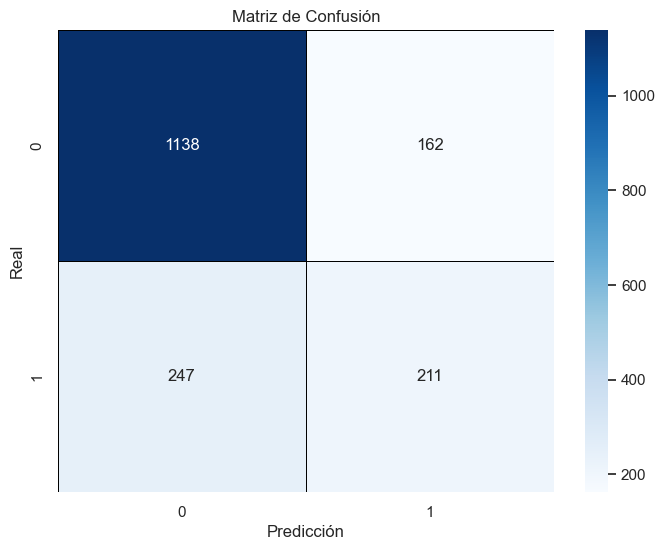

In [44]:
# Evaluamos el modelo utilizando la matriz de confusión y el informe de clasificación
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Realizamos las predicciones para el conjunto de pruebas
y_pred = model_rf.predict(X_test)

# Generamos la Matriz de Confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', linecolor='black',linewidths=0.7)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [46]:
valores = df['Churn'].unique() # extraemos los valores posibles de la variable objetivo (NO: 0 o YES: 1)
informe_clasificacion = classification_report(y_test, y_pred, target_names=valores)
print('Informe de Clasificación:\n', informe_clasificacion)

Informe de Clasificación:
               precision    recall  f1-score   support

          No       0.82      0.88      0.85      1300
         Yes       0.57      0.46      0.51       458

    accuracy                           0.77      1758
   macro avg       0.69      0.67      0.68      1758
weighted avg       0.75      0.77      0.76      1758



**Conclusiones:** la principal conclusión que podemos extraer es que el modelo está sesgado hacia la clase mayoritaria. Esto puede deberse al desequilibrio entre clases que vimos en el primer apartado. Tenemos un bajo recall para detectar los abandonos de los clientes, tan solo un 46%. Al predecir el abandono de un cliente, tan sólo lo detecta el 57% de las veces. En la matriz de confusión, vemos que para la clase 'Yes' o '1' vemos que tiene un total de 247 falsos negativos, lo que es una tasa de error muy elevada para un total de 458 muestras.


Vamos a utilizar **validación cruzada k-fold** para buscar un resultado más exacto o fiable de nuestro modelo. Dado el desbalance de las clases de nuestra variable objetivo, la métrica más útil es f1-score, que es una media armónica de precisión y recall, ya que para estos casos el 'accuracy' no es fiable.

In [50]:
from sklearn.model_selection import cross_val_score
import numpy as np

# entrenamos y evaluamos el modelo usando particiones distintas de los datos para entrenamiento y validación

# Validación cruzada con k=5 (número de particiones 5)
scores_k5 = cross_val_score(model_rf, X, y, cv=5, scoring='f1')
print(f'Validación cruzada (k=5):')
print(f'- Scores: {scores_k5}')
print(f'- Media de f1-score: {np.mean(scores_k5):.4f}')

# Validación cruzada con k=10 (número de particiones 10)
scores_k10 = cross_val_score(model_rf, X, y, cv=10, scoring='f1')
print(f'Validación cruzada (k=10):')
print(f'- Scores: {scores_k10}')
print(f'- Media de f1-score: {np.mean(scores_k10):.4f}')

Validación cruzada (k=5):
- Scores: [0.53835022 0.57226277 0.50737463 0.51212121 0.53073463]
- Media de f1-score: 0.5322
Validación cruzada (k=10):
- Scores: [0.57386364 0.56980057 0.54545455 0.56160458 0.53488372 0.47863248
 0.57636888 0.51190476 0.52380952 0.52147239]
- Media de f1-score: 0.5398


**Conclusiones:** vemos que con validación cruzada obtenemos una ligera mejora del f1-score, con un 0.53 respecto al 0.51 sin validación. Confirmamos que el modelo tiene dificultades para detectar la clase minoritaria. Aclarar que el f1-score que nos da el cross_val_score por defecto es el de la clase '1' o 'Yes', es decir, la clase positiva.

Vamos a implementar el balanceo de clases con la **técnica SMOTE** a ver si conseguimos mejorar nuestro modelo. Para ello también utilizaremos un 'pipeline' para evitar la fuga de datos de test a train al aplicar la validación cruzada.

In [54]:
from imblearn.over_sampling import SMOTE # Importamos librería SMOTE
from imblearn.pipeline import Pipeline  # Importamos Pipeline de la librería imblearn

# Definimos un pipeline con SMOTE y el modelo, para así evitar la fuga de datos de test a train y trabajar con orden
pipeline_rf_smote = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Generamos muestras sintéticas de la clase minoritaria con SMOTE
    ('model', RandomForestClassifier(random_state=42))
])

# Evaluamos con validación cruzada usando F1-score para la clase 1 o Yes
scores_smote = cross_val_score(pipeline_rf_smote, X, y, cv=5, scoring='f1')

# Mostramos resultados
print('F1-score promedio (Yes) con SMOTE:', scores_smote.mean())

F1-score promedio (Yes) con SMOTE: 0.572588745606156


**Conclusiones:** aplicando SMOTE para corregir el desbalance de las clases hemos mejorado nuestro f1-score a 0.57, pero sigue siendo un resultado mediocre para la clase 'Yes' de la variable objetivo.

### 5. Aplicar otros modelos: Regresión Logística incluyendo la validación cruzada.

Vamos a utilizar otro modelo que suele funcionar relativamente bien para clases desbalanceadas. La 'Regresión Logística' es un modelo sensible a la escala de las características, y no escalarlas puede degradar su rendimiento. Las variables con escalas mayores pueden dominar el proceso de optimización. Escalando obtendremos unos coeficientes comparables.

Procedemos a escalar sólo los datos de entrenamiento.

In [59]:
from sklearn.preprocessing import StandardScaler

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Ajustamos y transformamos datos de entrenamiento
X_test_scaled = scaler.transform(X_test) # Para el test sólo transformamos, no ajustamos

In [61]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression # importamos libería modelo Logistic Regression

# Ajustamos el modelo de regresión logística
model_rlog = linear_model.LogisticRegression()
model_rlog.fit(X_train_scaled, y_train)

# Aplicamos el modelo entrenado para realizar la predicción de nuestra variable objetivo y_pred_rlog...
# ...a partir de nuestra variable predictora de entrenamiento X_test_scaled
y_pred_rlog = model_rlog.predict(X_test_scaled)

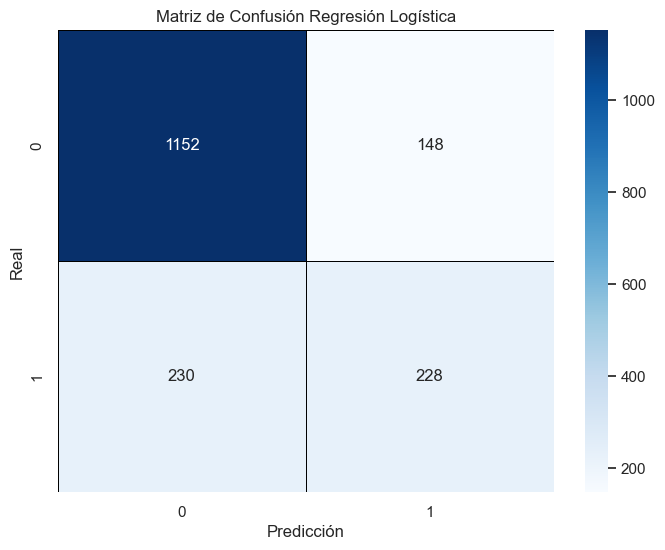

In [63]:
# Generamos la Matriz de Confusión
matriz_confusion_rlog = confusion_matrix(y_test, y_pred_rlog)

# Visualizar la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_rlog, annot=True, fmt='d', cmap='Blues', linecolor='black',linewidths=0.7)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Regresión Logística')
plt.show()

In [65]:
informe_clasificacion_rlog = classification_report(y_test, y_pred_rlog, target_names=valores)
print('Informe de Clasificación Regresión Logística:\n', informe_clasificacion_rlog)

Informe de Clasificación Regresión Logística:
               precision    recall  f1-score   support

          No       0.83      0.89      0.86      1300
         Yes       0.61      0.50      0.55       458

    accuracy                           0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.78      0.78      1758



**Conclusiones:** Los datos obtenidos son muy similares a los del modelo Random Forest, aunque con alguna ligera mejora, pero sigue siendo un resultado mediocre. La clase 'Yes' sigue presentando un f1-score muy pobre, tan sólo del 0.55, y el modelo no detecta la mitad de los clientes que abandonan (recall de 0.5).

Vamos a utilizar también validación cruzada, a ver si mejoramos el modelo.

Para nuestro modelo de Regresión Logística, dada la necesidad del escalado de los datos, tenemos que tener en cuenta que debemos escalar los datos dentro de cada fold (nunca antes de dividir los datos en folds), ya que si si escalamos todo el cojunto de datos 'X' antes de hacer la validación cruzada, el StandarScaler usará todas las muestras, incluidas las que más adelante pertenecerán a conjuntos de test o prueba.

Para evitar esto, utilizaremos Pipeline de sklearn, garantizando que el escalado se realize correctamente dentro de cada fold.

In [69]:
from sklearn.pipeline import make_pipeline

# Creamos el pipeline con escalado + regresión logística
pipeline_rlog = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42)
)

Además, para obtener una información más completa, vamos a analizar los **informes de clasificación**. Para no extraer un informe para cada fold, vamos a usar 'cross_val_predict' para obtener un único informe de clasificación global.

In [72]:
from sklearn.model_selection import cross_val_predict

# Obtener predicciones de validación cruzada para cv=5
y_pred_rlog_k5 = cross_val_predict(pipeline_rlog, X, y, cv=5)

# Mostrar el informe de clasificación
informe_rlog_k5 = classification_report(y, y_pred_rlog_k5, target_names=valores)
print('Informe de Clasificación Global - Regresión Logística (Validación cruzada, k=5):\n', informe_rlog_k5)

# Obtener predicciones de validación cruzada para cv=10
y_pred_rlog_k10 = cross_val_predict(pipeline_rlog, X, y, cv=10)

# Mostrar el informe de clasificación
informe_rlog_k10 = classification_report(y, y_pred_rlog_k10, target_names=valores)
print('Informe de Clasificación Global - Regresión Logística (Validación cruzada, k=10):\n', informe_rlog_k10)

Informe de Clasificación Global - Regresión Logística (Validación cruzada, k=5):
               precision    recall  f1-score   support

          No       0.84      0.90      0.87      5163
         Yes       0.65      0.53      0.58      1869

    accuracy                           0.80      7032
   macro avg       0.74      0.71      0.72      7032
weighted avg       0.79      0.80      0.79      7032

Informe de Clasificación Global - Regresión Logística (Validación cruzada, k=10):
               precision    recall  f1-score   support

          No       0.84      0.90      0.87      5163
         Yes       0.65      0.52      0.58      1869

    accuracy                           0.80      7032
   macro avg       0.74      0.71      0.72      7032
weighted avg       0.79      0.80      0.79      7032



**Conclusiones:** vemos que los resultados obtenidos son casi los mismos para k igual 5 o 10, por lo que nos podríamos quedar con un k=5, ya que requiere menos cálculo computancional. Si comparamos con los resultados sin validación cruzada, obtenemos ligeras mejoras en el f1-score de la clase Yes, pasando de 0.55 a 0.58, y un mejora en la precisión pasando de 0.78 a 0.80.

Vamos a aplicar el balanceado de las clases con la técnica SMOTE. Para ello usamos el Pipeline de la librería imblearn (no la de scikit-learn). De esta manera, el SMOTE sólo será aplicado a los datos de entrenamiento en cada iteración, de manera que los datos de test nunca se contaminan con muestras sintéticas.

In [76]:
# Definimos el pipeline con SMOTE, Escalado y Modelo
pipeline_rlog_smote = Pipeline([
    ('scaler', StandardScaler()),      # Escalado de características
    ('smote', SMOTE(random_state=42)), # Generamos muestras sintéticas de la clase minoritaria con SMOTE
    ('model', LogisticRegression(random_state=42))  # Modelo de Regresión Logística
])

# Obtenemos predicciones con validación cruzada (k=5)
y_pred_rlog_k5_smote = cross_val_predict(pipeline_rlog_smote, X, y, cv=5)

# Mostramos informe de clasificación para k=5
print('Informe con SMOTE (k=5):\n', classification_report(y, y_pred_rlog_k5_smote, target_names=valores))

# Obtenemos predicciones con validación cruzada (k=10)
y_pred_rlog_k10_smote = cross_val_predict(pipeline_rlog_smote, X, y, cv=10)

# Mostramos informe de clasificación para k=10
print('Informe con SMOTE (k=10):\n', classification_report(y, y_pred_rlog_k10_smote, target_names=valores))

Informe con SMOTE (k=5):
               precision    recall  f1-score   support

          No       0.91      0.70      0.79      5163
         Yes       0.50      0.81      0.61      1869

    accuracy                           0.73      7032
   macro avg       0.70      0.75      0.70      7032
weighted avg       0.80      0.73      0.75      7032

Informe con SMOTE (k=10):
               precision    recall  f1-score   support

          No       0.91      0.70      0.79      5163
         Yes       0.50      0.81      0.62      1869

    accuracy                           0.73      7032
   macro avg       0.70      0.76      0.70      7032
weighted avg       0.80      0.73      0.75      7032



**Conclusiones:** tras aplicar el SMOTE algunas métricas mejoran y otras empeoran.

Por una parte, tenemos una mejora en el recall de la clase 'Yes', que pasa de 0.53 a 0.81. Esto quiere decir que detecta mejor los abandonos reales. Pero por otra parte, el recall para la clase 'No' ha caído del 0.90 al 0.70, lo que significa que tenemos más falsos positivos o clasificaciones erróneas de abandono (churn) por parte de los clientes. Dependiendo de la necesidades, para una empresa puede ser interesenta detectar más casos de abandono aunque haya falsas alarmas, ya que les permite establecer estrategias para fidelizar al cliente antes de perderlos.

### 6. Aplicar SHAP a nuestros modelos.
**Aplica el paquete SHAP para calcular los valores SHAP de cada instancia del conjunto de datos.**

Vamos a aplicar SHAP a nuestro modelo de regresión logística con SMOTE, que fue el último que calculamos. Previamente tendremos que haberlo instalado (SHAP). 'LinearExplainer' está optimizado para modelos lineales como es Regresión Logística. 

In [80]:
import shap # Importamos librería

# Entrenamos el pipeline creado en el apartado anterior al completo (SMOTE + Escalado + Regresión Logística)
pipeline_rlog_smote.fit(X_train, y_train)

# Extraemos el modelo final del pipeline
modelo_final = pipeline_rlog_smote.named_steps['model']

# Creamos un explainer SHAP (usando los datos escalados del pipeline)
X_train_scaled = pipeline_rlog_smote.named_steps['scaler'].transform(X_train)
explainer = shap.LinearExplainer(modelo_final, X_train_scaled, feature_names=X.columns)

# Calculamos valores SHAP para el conjunto de test escalado
X_test_scaled = pipeline_rlog_smote.named_steps['scaler'].transform(X_test)
shap_values = explainer.shap_values(X_test_scaled)

**Visualización de interpretaciones: genera un gráfico de resumen para visualizar el impacto de cada característica en la predicción.**

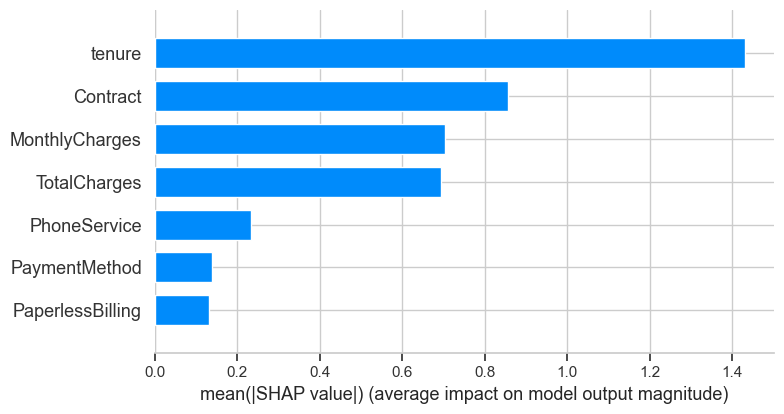

In [83]:
# Resumen global de importancia de cada variable
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type='bar')

**Conclusiones:** del gráfico anterior deducimos que la variable con mayor impacto en la predicción es 'ternure' (antigüedad), con una influencia muy alta, seguida de 'contract' (tipo de contrato) y con en un poco de menor medida aunque también importantes de 'MonthlyCharges' y 'TotalCharges', con unas influencias moderadas. El resto de varibles presentan un influencia muy baja y podríamos valorar prescindir de ellas.

**Visualización de interpretaciones: crea gráficos de dependencia para las características más importantes.**

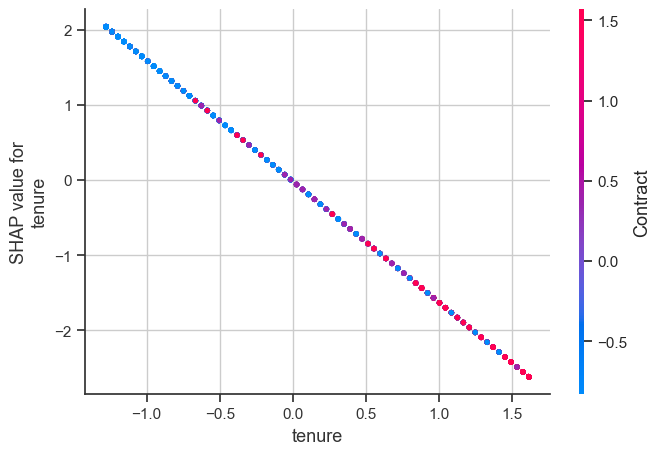

In [87]:
# Dependencia de una variable en particular: Ternure
shap.dependence_plot('tenure', shap_values, X_test_scaled, feature_names=X.columns)

**Conclusión:** tenemos una línea descendente. Vemos que a mayor antigüedad hay una menor probabilidad de abandono. Esta variable presenta un impacto negativo sobre la variable objetivo.

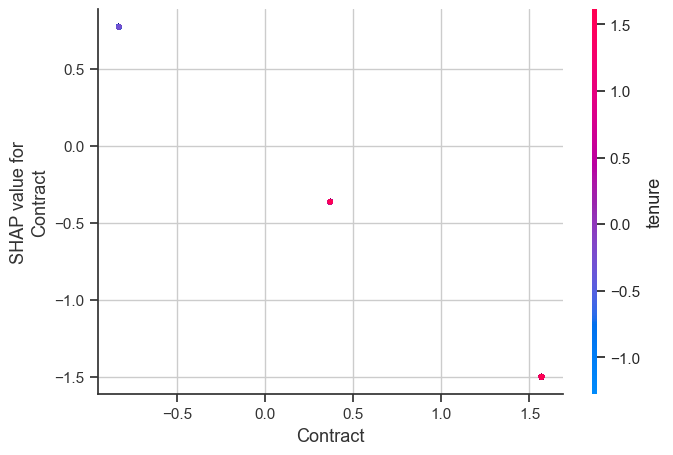

In [90]:
# Dependencia de una variable en particular: Contract
shap.dependence_plot('Contract', shap_values, X_test_scaled, feature_names=X.columns)

**Conclusión:** tenemos una línea descendente. Vemos que a mayor duración del contrato hay una menor probabilidad de abandono. Esta variable presenta un impacto negativo sobre la variable objetivo.

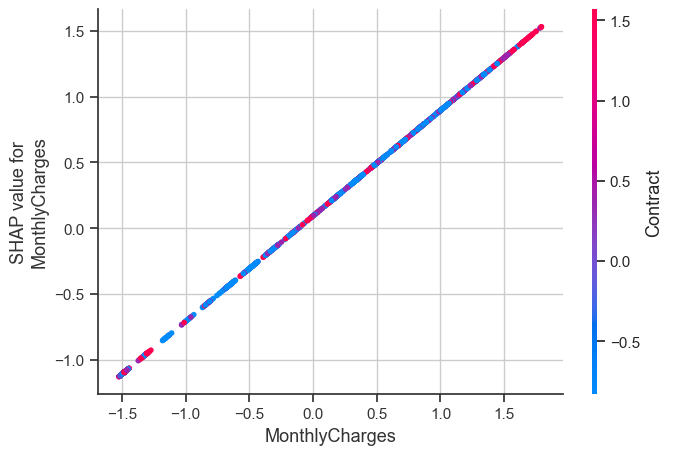

In [93]:
# Dependencia de una variable en particular: MonthlyCharges
shap.dependence_plot('MonthlyCharges', shap_values, X_test_scaled, feature_names=X.columns)

**Conclusión:** tenemos una línea ascendente. Vemos que a cargo mensual hay una mayor probabilidad de abandono. Esta variable presenta un impacto positivo sobre la variable objetivo.

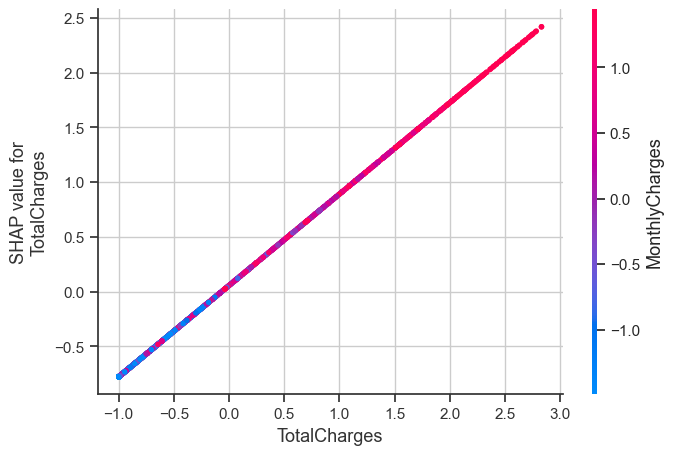

In [96]:
# Dependencia de una variable en particular: TotalCharges
shap.dependence_plot('TotalCharges', shap_values, X_test_scaled, feature_names=X.columns)

**Conclusión:** tenemos una línea ascendente. Vemos que a mayor facturación total hay una mayor probabilidad de abandono. Esta variable presenta un impacto positivo sobre la variable objetivo.

**Visualización de interpretaciones: visualiza un gráfico de fuerza para analizar predicciones específicas (contribución individual de cada característica a una predicción).**

In [104]:
# Visualizamos las explicaciones para una instancia específica, por ejemplo, la primera fija
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test_scaled[0, :], feature_names=X.columns)

**Conclusión:** los gráficos de fuerza muestran como cada variable contribuye a la predicción específica para una instancia en concreto. En nuestro ejemplo de arriba es para la primera instancia, es decir, nuestro primer cliente. El resultado de la predicción es f(x) = -5.91, lo que significa que este cliente en particular es muy poco probable que abandone. Vemos que hay variables con un impacto positivo furete, como son 'ternure' y 'Contract' y variables con impacto negativo fuerte, como MonthlyCharges o PaperlessBilling. Esta última sorprende, ya que siendo una variable a priori de muy bajo impacto puede influenciar tanto.

Nota: se ha probado a eliminar las variables 'PaperlessBilling' y 'PhoneService' en nuestro modelo, obteniendo resultados ligeramente peores.

Por último, SHAP también nos puede facilitar los valores SHAP para cada variable, usando la función summary_plot. Nos da una descripción general de qué características son más importantes para un modelo, pudiendo trazar los valores SHAP de cada característica para cada muestra. El gráfico siguiente clasifica las características por la suma de las magnitudes de los valores SHAP en todas las muestras y usa los valores SHAP para mostrar la distribución de los impactos que cada característica tiene en la salida del modelo. El color representa el valor de la característica (rojo -> alto, azul -> bajo).

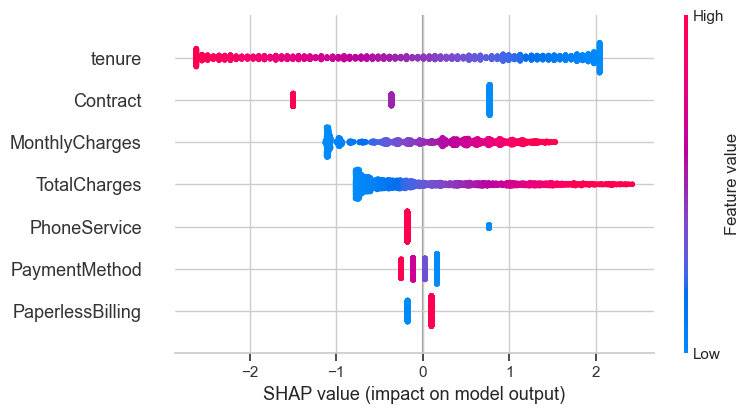

In [124]:
# Distribución de los valores SHAP para cada variable
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

**Conclusiones:** podemos observar como altos valores de ternure tienen un impacto negativo en la toma de decisión del modelo, al igual que con contract. Altos valores de MonthlyChagers y TotalCharges tienen un impacto positivo. La variable Contract para bajos valores tienen un impacto positivo también mientras que altos valores un impacto negativo. Vemos que este gráfico corrobora las conclusiones extraídas en los gráficos anteriores, donde analizábamos la despendencias individuales de cada variable.